In [1]:
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
pd.set_option("max_colwidth", None)


In [3]:
with open("full_results_rugpt3small.json") as f:
    data = json.load(f)

In [7]:
data = pd.DataFrame(data)

In [12]:
data.head()

,id,text,text_rus,perplexity,text_len
0,0_0,Hello\n,Привет\n,147517.750000,1
1,0_1,"Hello, what would you like to talk about?","Привет, о чём бы ты хотел поговорить?",79.524506,7
2,0_2,I am having a lot of anxiety about quitting my...,"У меня много тревог из-за того, что я ухожу с ...",80.749954,18
3,0_3,What makes your job stressful for you?,Что делает твою работу стрессовой для тебя?,136.674347,7
4,0_4,I have to deal with many people in hard financ...,Мне приходится иметь дело со многими людьми в ...,59.763260,14


In [9]:
data["text_len"] = data.text_rus.apply(lambda x: len(x.split()))
data["perplexity_log"] = data.perplexity.apply(lambda x: np.log(x))

In [71]:
data.text_len.describe()

count    38365.000000
mean        13.735671
std         11.216333
min          1.000000
25%          6.000000
50%         11.000000
75%         18.000000
max        151.000000
Name: text_len, dtype: float64

In [40]:
data.perplexity_log.describe()

count    38365.000000
mean         5.244102
std          1.925209
min          2.188075
25%          4.081689
50%          4.751866
75%          5.773474
max         20.926205
Name: perplexity_log, dtype: float64

<Axes: >

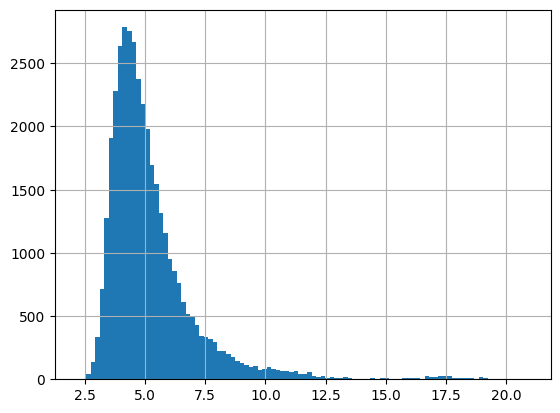

In [39]:
data.perplexity_log.hist(bins=100)

(0.0, 20.0)

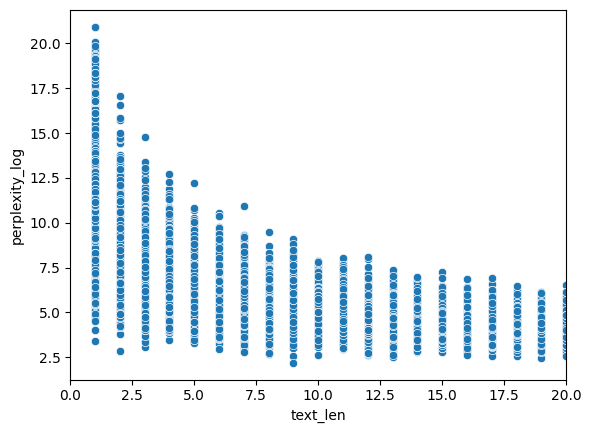

In [43]:
sns.scatterplot(data=data, x="text_len", y="perplexity_log")
plt.xlim(0,20)

<Axes: >

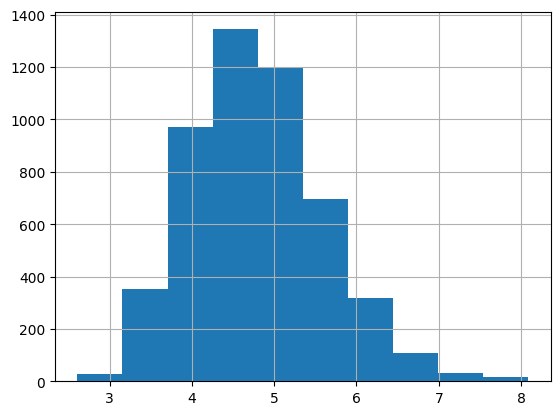

In [53]:
data[(data.text_len >=10) & (data.text_len <=12)].perplexity_log.hist()

In [61]:
data[(data.text_len >=10) & (data.text_len <=12)].perplexity_log.describe()

count    5061.000000
mean        4.794988
std         0.803878
min         2.609831
25%         4.222119
50%         4.728067
75%         5.292323
max         8.087142
Name: perplexity_log, dtype: float64

In [67]:
data["cat"] = pd.qcut(data.text_len, [x*0.1 for x in range(0,11,)])

In [69]:
data.cat.value_counts()

cat
(0.999, 3.0]     4508
(5.0, 7.0]       4184
(3.0, 5.0]       4040
(7.0, 9.0]       3882
(20.0, 27.0]     3857
(13.0, 16.0]     3826
(16.0, 20.0]     3787
(27.0, 151.0]    3770
(9.0, 11.0]      3424
(11.0, 13.0]     3087
Name: count, dtype: int64

In [70]:
data[((data.text_len >=10) & (data.text_len <=12)) & (data.perplexity_log<5.3)].sort_values("perplexity")[-20:]

,id,text,text_rus,perplexity,text_len,perplexity_log,cat
11103,352_20,"Kinda Ok, but struggling with some issues such as eating unhealthy","Вроде нормально, но борюсь с некоторыми проблемами, например, с нездоровым питанием.",53.839737,11,3.986012,"(9.0, 11.0]"
33063,1109_5,"Well, are you sure that he could have definitely afforded to loan you anything?","Ну, ты уверен, что он мог бы точно одолжить тебе что-то?",53.865505,11,3.986490,"(9.0, 11.0]"
28499,963_16,because same thing happen with me and i try it help me a lot,"потому что со мной то же самое происходит, и это очень помогает",53.936569,12,3.987809,"(11.0, 13.0]"
29599,996_10,"I am sorry, I was not trying to intrude :)","Извини, я не хотел лезть не в свое дело :)",53.961472,10,3.988270,"(9.0, 11.0]"
18120,599_3,I have been feeling very depressed and i don't know what to do. \n,"Я чувствую себя очень подавленным и не знаю, что делать. \n",54.011269,10,3.989193,"(9.0, 11.0]"
5988,189_13,That's really had to deal with. Try to surround yourself with loyal and truthful people.\n,Это действительно трудно пережить. Постарайся окружить себя преданными и честными людьми.\n,54.024879,11,3.989445,"(9.0, 11.0]"
17315,571_23,"Im glad i could help, thank you for sharing your thoughts with me","Я рад, что смог помочь. Спасибо, что поделились своими мыслями со мной",54.028400,12,3.989510,"(11.0, 13.0]"
24294,815_1,Hi. I'm doing fine. Just feeling a bit anxious.,Привет. У меня всё в порядке. Просто чувствую себя немного тревожно.,54.042496,11,3.989771,"(9.0, 11.0]"
17899,592_4,oh wow. Is that hard for you? Explain what's upsetting you about that.,"о, вау. Это сложно для тебя? Объясни, что тебя в этом расстраивает.",54.052906,12,3.989963,"(11.0, 13.0]"
32505,1092_3,It was unexpected and sudden. I found out he was cheating on me.\n,"Это произошло неожиданно и внезапно. Я узнал, что он мне изменяет.\n",54.066967,11,3.990223,"(9.0, 11.0]"
